In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import plotly.graph_objs as go
from plotly.offline import iplot


import cufflinks
cufflinks.go_offline()

cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



### Data looks like

In [18]:
data = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Chech how many missing values we have

In [19]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


### Getting description about data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Looking at Quantity and UnitPrice colimns. There we have negative numbers which can't be used for analysis.

In [21]:
print('Quantity column')
print(data.Quantity.describe())
print('UnitPrice column')
print(data.UnitPrice.describe())

Quantity column
count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64
UnitPrice column
count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


### Getting rid of negative numbers in Quantity and UnitPrice columns

In [22]:
data = data[(data.Quantity>0)&(data.UnitPrice>0)]

### We transform InvoiceDate to datetime format.
### And getting rid of rows with missing Customer IDs

In [23]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data = data.dropna(subset=['CustomerID'])

### Checking missing dates in our sales

In [8]:
from datetime import datetime, date
datelist = pd.date_range(start="2010-12-01",end="2011-12-09")
for i in data['InvoiceDate']:
    i = datetime.date(i)
    if i not in datelist:
        print(i)

Streaming output truncated to the last 5000 lines.
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
201

### Creating column with total revenue of every order.
### Creating columns for year and month when order is made

In [26]:
data=pd.read_csv("OnlineRetail.csv",encoding='ISO-8859-1')
data['TotalPrice'] = data['Quantity']*data['UnitPrice']
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month

### Getting knownledge about amount of invoices per month. The most active month is November.

<Axes: title={'center': 'Amount of invoices per month'}, xlabel='Year,Month'>

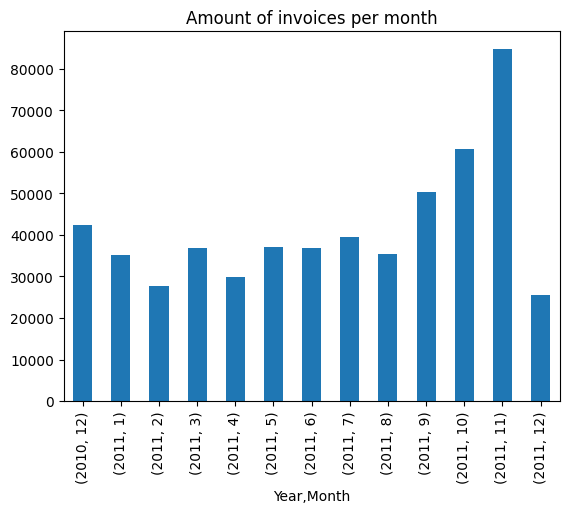

In [27]:
data.groupby(['Year', 'Month']).InvoiceNo.count().plot(kind='bar', title='Amount of invoices per month')

### Getting knowledge about amount of customers per month. It looks like previous graph.

<Axes: title={'center': 'Amount of customers per month'}, xlabel='Year,Month'>

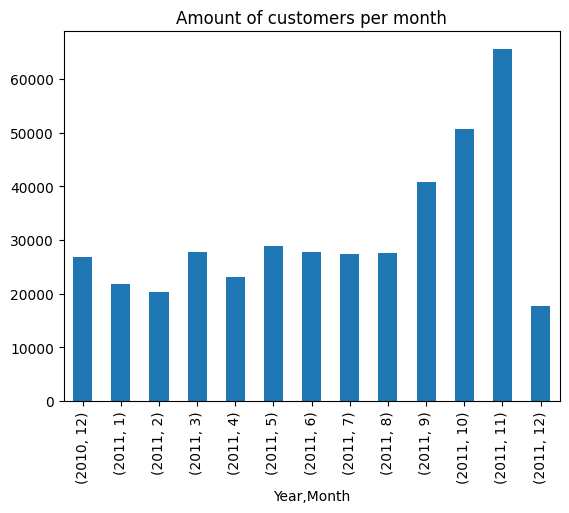

In [42]:
data.groupby(['Year', 'Month']).CustomerID.count().plot(kind='bar', title='Amount of customers per month')

### Getting knowledge about Total revenue per month. The best one is November (it is expected, becouse November was the most active month for sales)

In [29]:
import plotly.io
plotly.io.renderers.default = "colab"

In [44]:
px.bar(data[['InvoiceDate','TotalPrice']].set_index('InvoiceDate').resample('M').sum().reset_index(),
       x='InvoiceDate', y='TotalPrice', title = 'Total Revenue per month')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [34]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('OnlineRetail.csv', encoding='latin1')

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

a = data[data['Year'] == 2011].groupby('Month')['InvoiceNo'].nunique().reset_index()

b = data[data['Year'] == 2011].groupby('Month')['TotalPrice'].sum().reset_index()

a = a.merge(b, on='Month', how='inner')

fig = px.scatter(a, x='InvoiceNo', y='TotalPrice', hover_data=['Month'], title='Amount of invoices per month and total revenue distribution')

fig.show()


### TOP best 20 countries by revenue

In [36]:
px.pie(data.groupby('Country').TotalPrice.sum().reset_index()[:20], values='TotalPrice', names='Country',
      title='TOP BEST 20 COUNTRIES BY SALES')

### TOP worst 20 countries by revenue

In [37]:
px.pie(data.groupby('Country').TotalPrice.sum().reset_index()[20:], values='TotalPrice', names='Country',
      title='THE WORST 20 COUNTRIES BY SALES')

### Revenue by week

In [38]:
px.bar(data[['InvoiceDate','TotalPrice']].set_index('InvoiceDate').resample('W').sum().reset_index(),
       x='InvoiceDate', y='TotalPrice')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [39]:
data['Hour'] = data['InvoiceDate'].dt.hour
data['WeekDay']=data['InvoiceDate'].dt.weekday
data['WeekDay'] = data['WeekDay'].replace({0:'Mon', 1:'Thu',2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

### Find the best and the worst weekdays by sales. The best is Thursday and the worst is Sunday.

In [40]:
px.bar(data.groupby('WeekDay').TotalPrice.sum().reset_index(), x='WeekDay', y='TotalPrice')

### Find the best time for sales. It is 12 o'clock.

In [41]:
px.bar(data.groupby('Hour').TotalPrice.sum().reset_index(), x='Hour', y='TotalPrice')

# **Project Summary: Retail Sales Data Analysis**
# Data Loading and Cleaning

Loaded the dataset from a CSV file.
Cleaned the data by handling missing values, correcting data types, and removing duplicates.
Exploratory Data Analysis (EDA)

Descriptive Statistics: Calculated mean, median, and mode for key variables like quantity, unit price, and total sales.

Sales Trends: Analyzed sales trends over time to identify peak sales periods.

Customer Analysis: Identified the most frequent customers and their purchasing patterns.

Product Analysis: Determined the most popular products and their sales quantities.

Grouping and Aggregation

Grouped data by 'InvoiceNo' and 'StockCode' to find the total quantity ordered per invoice.
Identified the stock items with the highest total quantity ordered per invoice.
Visualization

Created bar charts and other visualizations to depict the most ordered stock items per invoice.
Visualized sales trends and customer purchasing patterns using line and bar graphs.

Insights and Findings

Highlighted key findings, such as the most popular products, top customers, and peak sales periods.
Provided actionable insights for improving sales and inventory management. **bold text** **bold text**


### Key Insights and Recommendations

- **Country Analysis**
  - Continue cooperation with EIRE, Germany, France, and Belgium.
  - Reevaluate and change relationships with Saudi Arabia and RSA (Republic of South Africa).

- **Monthly Sales Performance**
  - **Best Sales Month (2011)**: November.
  - **Worst Sales Months (2011)**: March and May.

- **Weekly Sales Performance**
  - **Best Weekday for Sales**: Thursday.
  - **Worst Weekday for Sales**: Sunday.

- **Hourly Sales Performance**
  - **Best Time for Sales**: 12 o'clock noon and the hours around it.

### Visualization of Key Findings

1. **Monthly Sales Performance**: A bar chart representing sales performance for each month.
2. **Weekly Sales Performance**: A bar chart comparing sales on different weekdays.
3. **Hourly Sales Performance**: A line graph showing sales trends throughout the day.

These insights can help in planning marketing strategies, inventory management, and improving overall sales performance.